In [1]:
import os
import pandas as pd
import numpy as np
import random
from pandas import DataFrame
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
import matplotlib
from matplotlib import pyplot as plt


workdir = "D://ResIC50_finalized_data//191205_rerun//ResNet//Dataset//EYDC9K_Znorm"


In [2]:
dataset = np.load(workdir + "//191204_EYDC9K_z_norm_z_norm_minmax.npz")
ss0 = np.load(workdir + '//191204_EYDC9K_z_norm_z_norm_minmax_r0.npz')

In [3]:
x = dataset['x']
y = dataset['y']
# y_linear = dataset['y_lnIC50']
ss0_train = ss0['train']
ss0_test = ss0['test']

In [4]:
training_image_array, training_label_array = x[ss0_train], y[ss0_train]
test_image_array, test_label_array = x[ss0_test], y[ss0_test]

# # In[9]:
# ori = training_image_array
# bat = np.zeros((ori.shape[0],178))
# cat = np.hstack([ori,bat])
# training_image_array = cat

# # In[8]:
# training_image_array.shape

# # In[10]:
# ori2 = test_image_array
# bat2 = np.zeros((ori2.shape[0],178))
# cat2 = np.hstack([ori2,bat2])
# test_image_array = cat2


In [5]:
# In[15]:
ab =[]
for i in range(100,200):
    ab.append(len(training_image_array) % i)
    
print(min(ab), ab.index(min(ab)))

0 37


In [6]:
x.shape

(9590, 41505)

In [7]:
training_image_array.shape

(8631, 41505)

In [8]:
train_X, train_y, test_X, test_y = training_image_array, training_label_array, test_image_array, test_label_array

# if K.image_data_format() == 'channels_first':
#     train_X = train_X.reshape(train_X.shape[0], 1, img_rows, img_cols)
#     test_X = test_X.reshape(x_test.shape[0], 1, img_rows, img_cols)
#     input_shape = (1, img_rows, img_cols)
# else:
#     train_X = train_X.reshape(train_X.shape[0], img_rows, img_cols, 1)
#     test_X = test_X.reshape(test_X.shape[0], img_rows, img_cols, 1)
#     input_shape = (img_rows, img_cols, 1)


In [9]:
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(8631, 41505) (8631,) (959, 41505) (959,)


In [10]:
train_X = np.nan_to_num(train_X)
test_X = np.nan_to_num(test_X)

In [11]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
# train_X /= 255
# test_X /= 255
print('train_X shape:', train_X.shape)
print(train_X.shape[0], 'train samples')
print(test_X.shape[0], 'test samples')

train_X shape: (8631, 41505)
8631 train samples
959 test samples


In [12]:
# https://towardsdatascience.com/how-to-perform-ridge-and-ridge-regression-in-python-3b3b75541ad8
# https://brunch.co.kr/@itschloe1/11
StartTime8 = datetime.now()
print("StartTime :", StartTime8)

ridge_regressor = Ridge(alpha=0.001)

ridge_regressor.fit(train_X,train_y)

EndTime8 = datetime.now()
print("EndTime :", EndTime8)

StartTime : 2019-12-10 14:02:21.794529


C:\Users\ylab\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\linear_model\ridge.py:167: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


EndTime : 2019-12-10 14:03:52.714456


In [13]:
import matplotlib
from matplotlib import pyplot as plt

In [14]:
predicted_classes = ridge_regressor.predict(test_X)

In [15]:
predicted_value = predicted_classes

In [16]:
a = pd.DataFrame(predicted_value)
b = pd.DataFrame(test_label_array)
c = pd.concat([a,b], axis=1)
c.columns=["Predicted","Test"]
workdir = "D://ResIC50_finalized_data//191205_rerun//ResNet//Result//EYDC-9K//Ridge"
c.to_csv(workdir + '//191205_EYDC_9K_znorm_znorm_minmax_Ridge_result.csv')


In [17]:
c

,Predicted,Test
0,1.459135,2.079442
1,1.668262,2.079442
2,-0.508413,-1.595384
3,1.930426,2.079442
4,-1.303308,-3.566824
5,1.744066,2.079442
6,-1.335166,-0.294071
7,1.705788,2.079442
8,2.438187,2.039509
9,1.364069,-0.077654


In [18]:
predicted_value.shape

(959,)

In [19]:
import pickle
from sklearn.externals import joblib
joblib.dump(ridge_regressor, workdir + '//191205_EYDC_9K_znorm_znorm_minmax_Ridge_model.pkl') 


['D://ResIC50_finalized_data//191205_rerun//ResNet//Result//EYDC-9K//Ridge//191205_EYDC_9K_znorm_znorm_minmax_Ridge_model.pkl']

In [20]:
clf_from_joblib = joblib.load(workdir + '//191205_EYDC_9K_znorm_znorm_minmax_Ridge_model.pkl') 
clf_from_joblib.predict(test_X)

array([ 1.45913517e+00,  1.66826224e+00, -5.08413315e-01,  1.93042648e+00,
       -1.30330789e+00,  1.74406552e+00, -1.33516634e+00,  1.70578790e+00,
        2.43818712e+00,  1.36406922e+00,  1.01580298e+00,  2.69546866e+00,
        1.86859667e+00,  1.71509218e+00, -2.39068556e+00,  2.07858944e+00,
        1.61052513e+00, -3.77864933e+00,  1.11282921e+00,  1.93278253e+00,
        2.14662218e+00,  1.56746483e+00, -3.67133379e+00,  1.96723056e+00,
        2.42845821e+00,  1.92914438e+00, -3.03569698e+00,  1.04953766e+00,
        8.90328765e-01, -3.23931551e+00,  2.47376299e+00,  7.37905145e-01,
        1.90617335e+00,  5.47697067e-01,  2.19383621e+00, -2.92051888e+00,
        1.90231550e+00,  1.56705916e+00,  2.00045347e+00,  1.37201750e+00,
        2.12673402e+00, -1.49266946e+00, -2.25982714e+00,  1.95876229e+00,
        1.06760728e+00, -4.00613356e+00,  9.87147272e-01,  2.35873628e+00,
        8.55239451e-01,  2.18275023e+00,  1.23703480e-01,  1.90061557e+00,
        1.46378481e+00,  

In [21]:
from sklearn.metrics import r2_score
r2_value = r2_score(b,a)
print(r2_value)

0.7011568719814281


In [22]:
from scipy.stats import linregress
linregress(b[0], a[0])

LinregressResult(slope=0.7174201751375779, intercept=0.250125831669741, rvalue=0.8375677394166355, pvalue=1.7190754170305042e-253, stderr=0.015127093754629804)

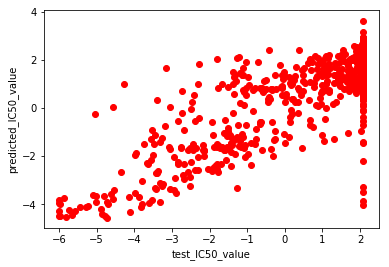

In [23]:
plt.scatter(test_label_array,predicted_value,c='red')
plt.xlabel('test_IC50_value')
plt.ylabel('predicted_IC50_value')
plt.savefig(workdir + '//191205_EYDC_9K_znorm_znorm_minmax_Ridge_scatter_plot.png')

In [24]:
rse = ((b[0]-a[0])**2).sum()
mse = rse / len(b)
print("Final rmse value is =",np.sqrt(mse))

Final rmse value is = 1.076385202515262
